In [1]:
# ===========================================
#  SETUP
# ===========================================

import os
from roboflow import Roboflow
from ultralytics import YOLO

In [ ]:
# ===========================================
#  DOWNLOAD DATASET
# ===========================================
print("="*70)
print("📥 DOWNLOADING DATASET FROM ROBOFLOW")
print("="*70)

rf = Roboflow(api_key="VAZIASyMaqcoDN9hqJtp")
project = rf.workspace("ta-sdwpc").project("my-first-project-30bdp")
version = project.version(3)
dataset = version.download("yolov8")

data_path = dataset.location + "/data.yaml"

print(f"Dataset downloaded at: {data_path}")
print("="*70)


In [10]:

# ===========================================
#  TRAINING CONFIG
# ===========================================

# data_path = dataset.location + "/data.yaml"

epochs = 50
imgsz = 640
batch = 16

print("\n📊 Training Configuration")
print("="*70)
print(f"Epochs        : {epochs}")
print(f"Image Size    : {imgsz}")
print(f"Batch Size    : {batch}")
print(f"Dataset YAML  : {"/data.yaml"}")
print("="*70)




📊 Training Configuration
Epochs        : 50
Image Size    : 640
Batch Size    : 16
Dataset YAML  : /data.yaml


In [13]:
# ===========================================
#  START TRAINING
# ===========================================
print("\n🚀 STARTING YOLO TRAINING")
print("="*70)

model = YOLO("yolov8n.pt")

results = model.train(
    data="data.yaml",
    epochs=epochs,
    imgsz=imgsz,
    batch=batch
)





🚀 STARTING YOLO TRAINING
Ultralytics 8.3.235  Python-3.13.7 torch-2.9.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

In [14]:
# ===========================================
#  SAVE SUMMARY
# ===========================================
print("\n" + "="*70)
print("🎉 TRAINING COMPLETE")
print("="*70)

save_dir = model.trainer.save_dir  # Folder training
weights_dir = os.path.join(save_dir, "weights")

print(f"📁 Save directory : {save_dir}")
print(f"✔ best.pt         : {weights_dir}/best.pt")
print(f"✔ last.pt         : {weights_dir}/last.pt")
print("="*70)


🎉 TRAINING COMPLETE
📁 Save directory : C:\Users\bagus\runs\detect\train2
✔ best.pt         : C:\Users\bagus\runs\detect\train2\weights/best.pt
✔ last.pt         : C:\Users\bagus\runs\detect\train2\weights/last.pt


In [18]:
# ===========================================
#  MODEL TEST
# ===========================================

model = YOLO("runs/detect/train2/weights/best.pt")
model.predict(
    source="image-test-model",   
    save=True,
    # conf=0.5                
)


image 1/4 d:\Main Storage\Documents\Lecture\Semester\Semester 7\Subject\Tugas Akhir\Programs\parking-slot-detektor-v2\image-test-model\frame2_0100.jpg: 384x640 14 motorcycles, 42.1ms
image 2/4 d:\Main Storage\Documents\Lecture\Semester\Semester 7\Subject\Tugas Akhir\Programs\parking-slot-detektor-v2\image-test-model\frame2_0172.jpg: 384x640 14 motorcycles, 31.5ms
image 3/4 d:\Main Storage\Documents\Lecture\Semester\Semester 7\Subject\Tugas Akhir\Programs\parking-slot-detektor-v2\image-test-model\frame_0082.jpg: 384x640 11 motorcycles, 30.8ms
image 4/4 d:\Main Storage\Documents\Lecture\Semester\Semester 7\Subject\Tugas Akhir\Programs\parking-slot-detektor-v2\image-test-model\frame_0109.jpg: 384x640 14 motorcycles, 31.0ms
Speed: 3.0ms preprocess, 33.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\bagus\runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'motorcycle'}
 obb: None
 orig_img: array([[[ 39,  41,  42],
         [ 36,  38,  39],
         [ 32,  34,  35],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 36,  38,  39],
         [ 33,  35,  36],
         [ 29,  31,  32],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 32,  34,  35],
         [ 29,  31,  32],
         [ 26,  28,  29],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[108, 106,  98],
         [108, 106,  98],
         [108, 106,  98],
         ...,
         [ 19,  22,  37],
         [ 19,  22,  37],
         [ 19,  22,  37]],
 
        [[108, 106,  98],
         [108, 106,  98],
         [108, 106,  98],
         ...,
         [ 19,


0: 384x640 13 motorcycles, 95.1ms
Speed: 19.0ms preprocess, 95.1ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)


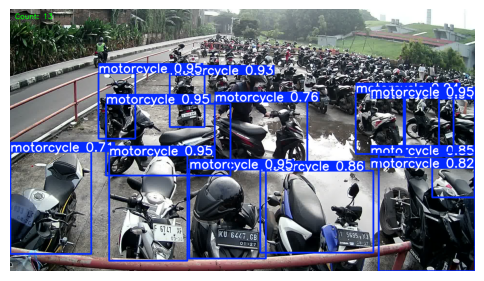


0: 384x640 14 motorcycles, 39.0ms
Speed: 2.0ms preprocess, 39.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


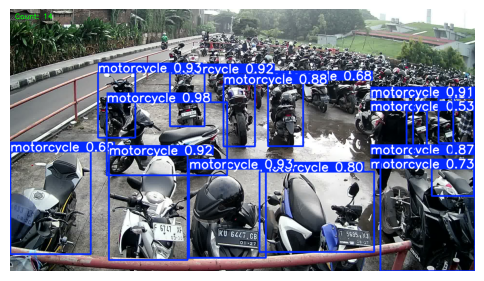


0: 384x640 14 motorcycles, 43.4ms
Speed: 1.7ms preprocess, 43.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


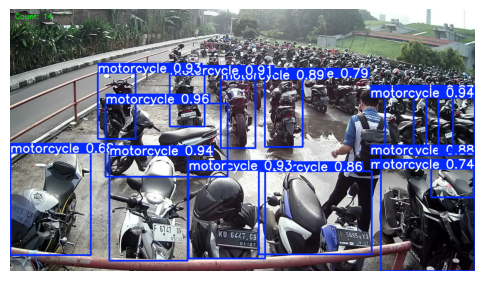


0: 384x640 11 motorcycles, 44.0ms
Speed: 1.8ms preprocess, 44.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


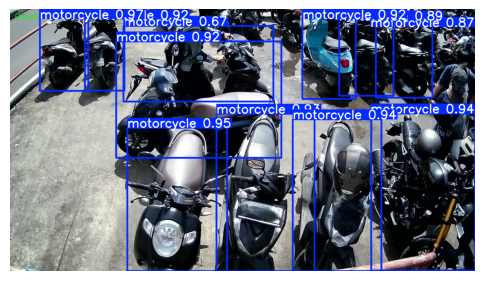


0: 384x640 14 motorcycles, 44.7ms
Speed: 2.2ms preprocess, 44.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


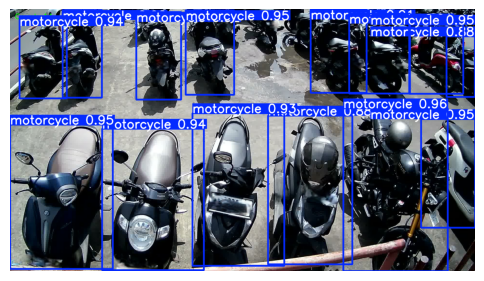

Selesai! Semua hasil disimpan di folder output/


In [3]:
# ===========================================
#  MODEL TEST FOR COUNT
# ===========================================

import cv2
import glob
import os
from ultralytics import YOLO
from matplotlib import pyplot as plt

# Load model
model = YOLO("runs/detect/train2/weights/best.pt")

# Folder output
os.makedirs("output", exist_ok=True)

# Loop semua gambar
for file in glob.glob("image-test-model/*.jpg"):

    frame = cv2.imread(file)

    # YOLO prediction (sekali saja)
    results = model(frame, conf=0.5)[0]

    # Hitung objek
    # count = sum(1 for box in results.boxes if box.conf > 0.5)
    count = len(results.boxes)

    # Tulis Count di gambar
    cv2.putText(
        frame,
        f"Count: {count}",
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 255, 0),
        2
    )

    # Gambar bounding box YOLO
    annotated = results.plot()

    # Tampilkan
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


    # Simpan output
    filename = os.path.basename(file)
    cv2.imwrite(f"output/{filename}", annotated)

print("Selesai! Semua hasil disimpan di folder output/")



0: 384x640 14 motorcycles, 68.5ms
Speed: 4.8ms preprocess, 68.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


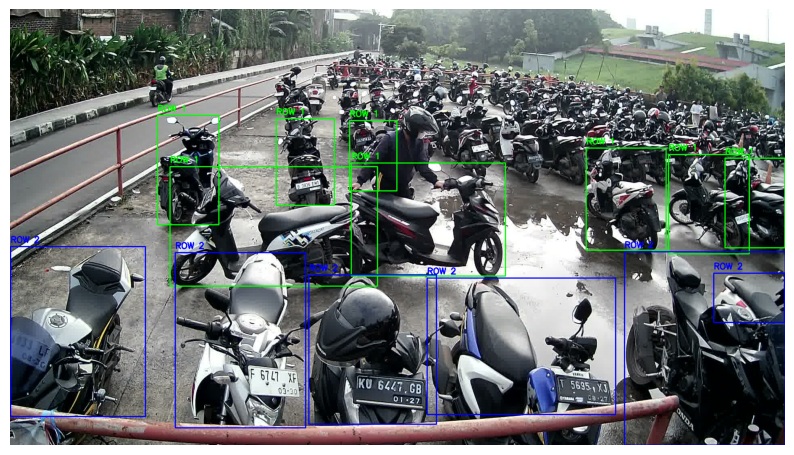

True

In [2]:
import cv2
import glob
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# LOAD MODEL YOLO
# =============================================================
model = YOLO("runs/detect/train2/weights/best.pt")

# =============================================================
# AMBIL SATU GAMBAR UNTUK DITEST
# =============================================================
image_files = glob.glob("image-test-model/*.jpg")

if len(image_files) == 0:
    raise FileNotFoundError("Tidak ada file .jpg di folder image-test-model/")

image_path = image_files[0]  # Ambil gambar pertama
frame = cv2.imread(image_path)

# =============================================================
# YOLO PREDICTION
# =============================================================
results = model(frame)[0]

# =============================================================
# AMBIL BOUNDING BOX
# =============================================================
boxes = []
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    boxes.append({"x1": x1, "y1": y1, "x2": x2, "y2": y2})

# Sort dari posisi vertikal (atas → bawah)
boxes = sorted(boxes, key=lambda b: b["y1"])

# =============================================================
# PEMISAHAN ROW SECARA OTOMATIS
# =============================================================
THRESHOLD = 50
row1 = []
row2 = []

row1.append(boxes[0])
y2_row1_reference = boxes[0]["y2"]

for b in boxes[1:]:
    gap = b["y1"] - y2_row1_reference
    if gap > THRESHOLD:
        row2.append(b)
    else:
        row1.append(b)

# =============================================================
# VISUALISASI ROW DI GAMBAR
# =============================================================
for b in row1:
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), (0, 255, 0), 2)
    cv2.putText(frame, "ROW 1", (int(b["x1"]), int(b["y1"] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

for b in row2:
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), (255, 0, 0), 2)
    cv2.putText(frame, "ROW 2", (int(b["x1"]), int(b["y1"] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# =============================================================
# TAMPILKAN HASIL
# =============================================================
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

filename = os.path.basename(image_path)
cv2.imwrite(f"output/{filename}", frame)


0: 384x640 14 motorcycles, 38.3ms
Speed: 2.3ms preprocess, 38.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


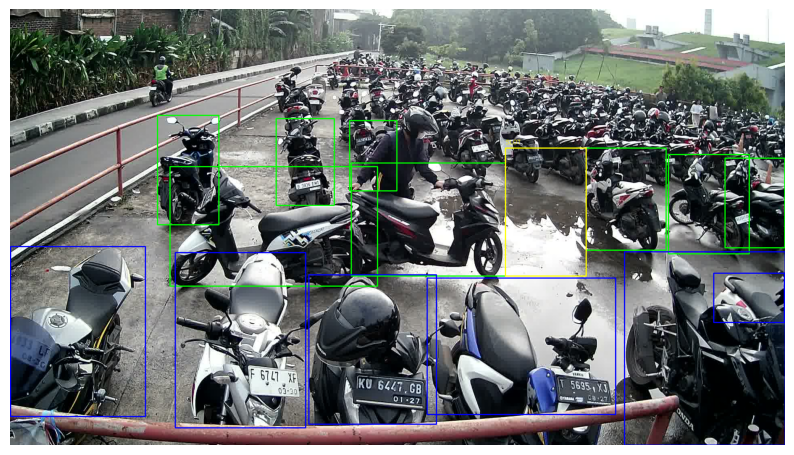

True

In [3]:
import cv2
import glob
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# LOAD MODEL YOLO
# =============================================================
model = YOLO("runs/detect/train2/weights/best.pt")

# =============================================================
# AMBIL SATU GAMBAR UNTUK DITEST
# =============================================================
image_files = glob.glob("image-test-model/*.jpg")

if len(image_files) == 0:
    raise FileNotFoundError("Tidak ada file .jpg di folder image-test-model/")

image_path = image_files[0]
frame = cv2.imread(image_path)

# =============================================================
# YOLO PREDICTION
# =============================================================
results = model(frame)[0]

# =============================================================
# EXTRACT BOUNDING BOX
# =============================================================
boxes = []
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    boxes.append({"x1": x1, "y1": y1, "x2": x2, "y2": y2})

# Sort vertikal
boxes = sorted(boxes, key=lambda b: b["y1"])

# =============================================================
# PEMISAHAN ROW
# =============================================================
THRESHOLD_Y = 50
row1, row2 = [], []

row1.append(boxes[0])
y2_row1_reference = boxes[0]["y2"]

for b in boxes[1:]:
    gap = b["y1"] - y2_row1_reference
    if gap > THRESHOLD_Y:
        row2.append(b)
    else:
        row1.append(b)

# =============================================================
# FUNGSI: DETEKSI GAP SLOT PER ROW (IMPROVED)
# =============================================================
def detect_gaps(row, frame, min_gap=100, slot_width=100):
    """
    Deteksi gap dan buat multiple bounding boxes untuk slot kosong
    
    Args:
        row: List bounding boxes dalam satu row
        frame: Frame gambar
        min_gap: Minimum gap untuk deteksi slot (default 100px)
        slot_width: Lebar estimasi satu slot (default 100px)
    """
    # Sort dari kiri ke kanan
    row_sorted = sorted(row, key=lambda b: b["x1"])

    for i in range(len(row_sorted) - 1):
        current = row_sorted[i]
        next_box = row_sorted[i + 1]

        # Hitung jarak antar bounding box
        gap = next_box["x1"] - current["x2"]

        if gap >= min_gap:
            # Hitung jumlah slot yang bisa masuk
            num_slots = int(gap // slot_width)

            # Koordinat Y (ambil dari dua box sekitar)
            y1 = int(min(current["y1"], next_box["y1"]))
            y2 = int(max(current["y2"], next_box["y2"]))

            # Bagi gap menjadi beberapa slot
            slot_x_start = current["x2"]
            actual_slot_width = gap / num_slots

            for slot_idx in range(num_slots):
                x1 = int(slot_x_start + slot_idx * actual_slot_width)
                x2 = int(slot_x_start + (slot_idx + 1) * actual_slot_width)

                # Gambar kotak slot kosong (kuning)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
                cv2.putText(frame, "SLOT", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)

# =============================================================
# GAMBAR ROW NORMAL
# =============================================================
for b in row1:
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), (0, 255, 0), 2)
for b in row2:
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), (255, 0, 0), 2)

# =============================================================
# DETEKSI GAP PER ROW
# =============================================================
detect_gaps(row1, frame, min_gap=100, slot_width=100)
detect_gaps(row2, frame, min_gap=100, slot_width=100)

# =============================================================
# TAMPILKAN HASIL
# =============================================================
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Simpan hasil
os.makedirs("output", exist_ok=True)
filename = os.path.basename(image_path)
cv2.imwrite(f"output/{filename}", frame)


0: 384x640 14 motorcycles, 63.9ms
Speed: 2.7ms preprocess, 63.9ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)


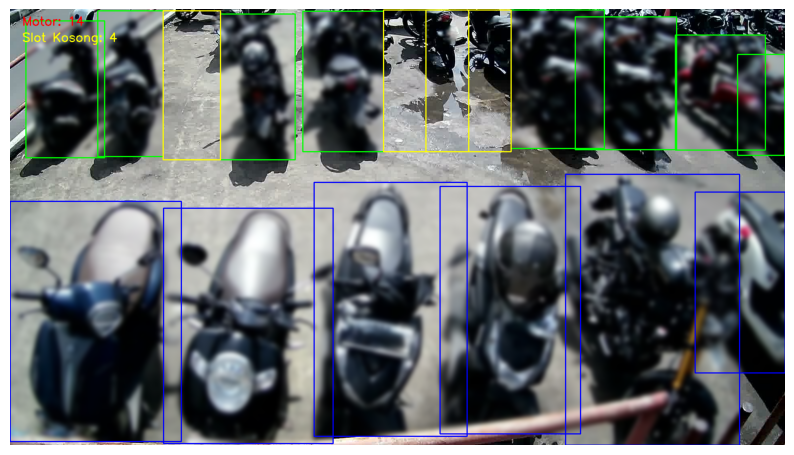

===== HASIL DETEKSI =====
Total Motor       : 14
Motor Row 1       : 8
Motor Row 2       : 6
Slot Kosong Row 1 : 4
Slot Kosong Row 2 : 0
Total Slot Kosong : 4


In [ ]:
import cv2
import glob
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# LOAD MODEL YOLO
# =============================================================
model = YOLO("runs/detect/train2/weights/best.pt")

# =============================================================
# LOAD IMAGE
# =============================================================
image_files = glob.glob("image-test-model/frame_0109.jpg")
if len(image_files) == 0:
    raise FileNotFoundError("Tidak ada file .jpg")

image_path = image_files[0]
frame = cv2.imread(image_path)

# =============================================================
# YOLO PREDICTION
# =============================================================
results = model(frame)[0]

# =============================================================
# EXTRACT MOTOR BOUNDING BOX
# =============================================================
boxes = []
for box in results.boxes:
    class_id = int(box.cls[0])
    class_name = model.names[class_id]

    if class_name.lower() == "motorcycle":
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        boxes.append({"x1": x1, "y1": y1, "x2": x2, "y2": y2})

total_motor = len(boxes)

if total_motor == 0:
    print("Tidak ada motor terdeteksi.")
    exit()

# Sort vertikal
boxes = sorted(boxes, key=lambda b: b["y1"])

# =============================================================
# BLUR MOTOR
# =============================================================
def blur_objects(frame, box_list, ksize=35):
    for b in box_list:
        x1, y1, x2, y2 = map(int, [b["x1"], b["y1"], b["x2"], b["y2"]])
        roi = frame[y1:y2, x1:x2]
        frame[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (ksize, ksize), 0)
    return frame

frame = blur_objects(frame, boxes)

# =============================================================
# SPLIT ROW
# =============================================================
THRESHOLD_Y = 50
row1, row2 = [], []

row1.append(boxes[0])
y_ref = boxes[0]["y2"]

for b in boxes[1:]:
    if b["y1"] - y_ref > THRESHOLD_Y:
        row2.append(b)
    else:
        row1.append(b)

motor_row1 = len(row1)
motor_row2 = len(row2)

# =============================================================
# DETECT SLOT FUNCTION
# =============================================================
def detect_slots(row, frame, min_gap=100, slot_width=100):
    slot_count = 0

    if len(row) < 2:
        return slot_count

    row = sorted(row, key=lambda b: b["x1"])

    for i in range(len(row) - 1):
        curr = row[i]
        nextb = row[i + 1]

        gap = nextb["x1"] - curr["x2"]

        if gap >= min_gap:
            num_slots = int(gap // slot_width)
            slot_count += num_slots

            y1 = int(min(curr["y1"], nextb["y1"]))
            y2 = int(max(curr["y2"], nextb["y2"]))
            start_x = curr["x2"]
            slot_w = gap / num_slots

            for s in range(num_slots):
                x1 = int(start_x + s * slot_w)
                x2 = int(start_x + (s + 1) * slot_w)

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
                cv2.putText(frame, "SLOT", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)

    return slot_count

# =============================================================
# DRAW MOTOR BOX
# =============================================================
for b in row1:
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), (0, 255, 0), 2)

for b in row2:
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), (255, 0, 0), 2)

# =============================================================
# SLOT COUNT
# =============================================================
slot_row1 = detect_slots(row1, frame)
slot_row2 = detect_slots(row2, frame)
total_slot = slot_row1 + slot_row2

# =============================================================
# DISPLAY INFO
# =============================================================
cv2.putText(frame, f"Motor: {total_motor}", (30, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

cv2.putText(frame, f"Slot Kosong: {total_slot}", (30, 80),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

# =============================================================
# SHOW & SAVE
# =============================================================
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

os.makedirs("output", exist_ok=True)
cv2.imwrite(f"output/{os.path.basename(image_path)}", frame)

# =============================================================
# LOG TERMINAL (UNTUK TA)
# =============================================================
print("===== HASIL DETEKSI =====")
print(f"Total Motor       : {total_motor}")
print(f"Motor Row 1       : {motor_row1}")
print(f"Motor Row 2       : {motor_row2}")
print(f"Slot Kosong Row 1 : {slot_row1}")
print(f"Slot Kosong Row 2 : {slot_row2}")
print(f"Total Slot Kosong : {total_slot}")


Loading YOLO model...
Processing image: image-test-model\frame2_0100.jpg

0: 384x640 14 motorcycles, 96.1ms
Speed: 7.5ms preprocess, 96.1ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)
Total motor terdeteksi: 14

HASIL DETEKSI:

ROW 1:
  Total motor: 8
  Motor normal: 6
  Motor melanggar (memanjang): 2

ROW 2:
  Total motor: 6
  Motor normal: 4
  Motor melanggar (memanjang): 2

TOTAL:
  Total motor: 14
  Motor normal: 10
  Motor melanggar: 4


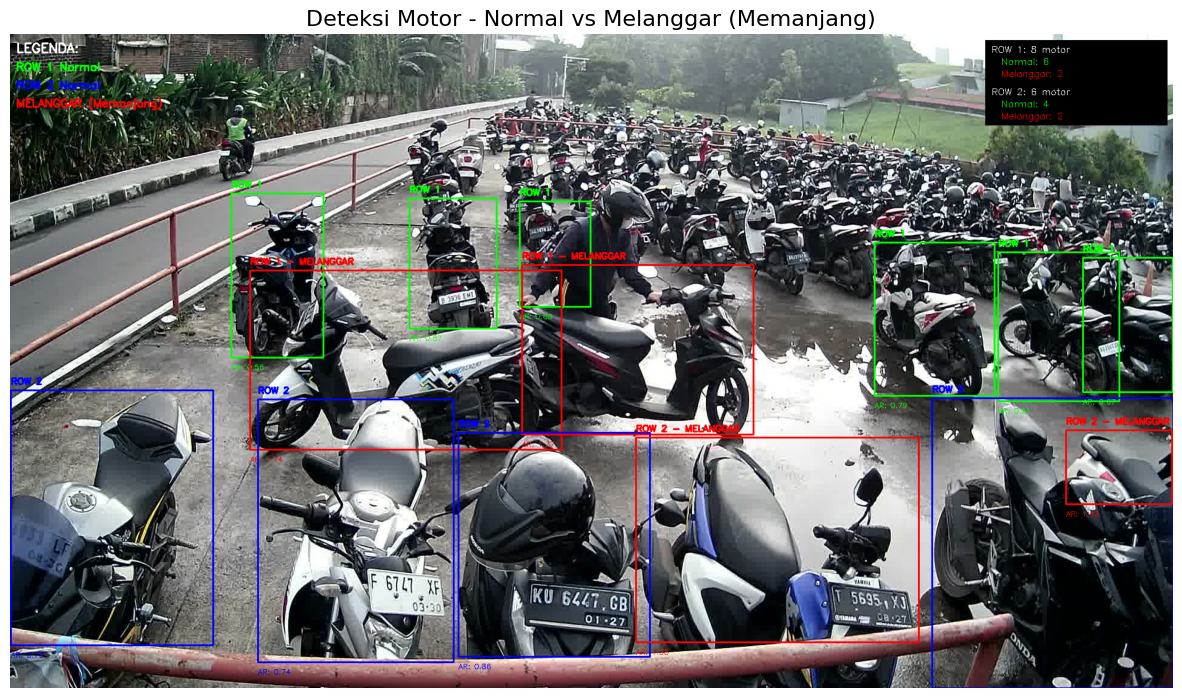


✓ Hasil disimpan di: output/frame2_0100.jpg

DETAIL SETIAP MOTOR:

ROW 1:
  Motor 1: Normal | AR=0.56 | Size=152x270px
  Motor 2: Normal | AR=0.67 | Size=144x214px
  Motor 3: Normal | AR=0.68 | Size=117x173px
  Motor 4: Normal | AR=0.79 | Size=198x252px
  Motor 5: Normal | AR=0.81 | Size=199x246px
  Motor 6: Normal | AR=0.67 | Size=148x222px
  Motor 7: MELANGGAR | AR=1.37 | Size=382x279px
  Motor 8: MELANGGAR | AR=1.74 | Size=514x296px

ROW 2:
  Motor 1: Normal | AR=0.79 | Size=334x420px
  Motor 2: Normal | AR=0.83 | Size=397x478px
  Motor 3: Normal | AR=0.74 | Size=322x434px
  Motor 4: MELANGGAR | AR=1.43 | Size=174x121px
  Motor 5: Normal | AR=0.86 | Size=316x370px
  Motor 6: MELANGGAR | AR=1.38 | Size=467x338px

CARA KERJA DETEKSI PELANGGARAN:

1. ASPECT RATIO (AR) = Lebar Bounding Box / Tinggi Bounding Box

2. KLASIFIKASI:
   - Motor Normal (parkir benar):
     * AR < 1.2 (tinggi > lebar)
     * Motor menghadap ke kamera

   - Motor Melanggar (parkir memanjang):
     * AR > 1.2 (l

In [1]:
"""
Program Deteksi Motor dengan Pembedaan Motor Melanggar (Parkir Memanjang)
Membedakan motor normal vs motor yang parkir memanjang (melanggar aturan)
"""

import cv2
import glob
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

# =============================================================
# LOAD MODEL YOLO
# =============================================================
print("Loading YOLO model...")
model = YOLO("runs/detect/train2/weights/best.pt")

# =============================================================
# AMBIL SATU GAMBAR UNTUK DITEST
# =============================================================
image_files = glob.glob("image-test-model/*.jpg")

if len(image_files) == 0:
    raise FileNotFoundError("Tidak ada file .jpg di folder image-test-model/")

image_path = image_files[0]
frame = cv2.imread(image_path)
print(f"Processing image: {image_path}")

# =============================================================
# YOLO PREDICTION
# =============================================================
results = model(frame)[0]

# =============================================================
# AMBIL BOUNDING BOX + ANALISIS ORIENTASI
# =============================================================
boxes = []
for box in results.boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    
    # Hitung lebar dan tinggi bounding box
    width = x2 - x1
    height = y2 - y1
    
    # Hitung aspect ratio (perbandingan lebar:tinggi)
    aspect_ratio = width / height if height > 0 else 0
    
    # LOGIKA DETEKSI MOTOR MEMANJANG (MELANGGAR):
    # ---------------------------------------------
    # Motor normal parkir: lebar < tinggi (aspect_ratio < 1)
    # Motor memanjang (melanggar): lebar > tinggi (aspect_ratio > 1)
    
    # Threshold untuk menentukan motor melanggar
    # Anda bisa adjust nilai ini (default: 1.2)
    VIOLATION_THRESHOLD = 1.2
    
    is_violation = aspect_ratio > VIOLATION_THRESHOLD
    
    boxes.append({
        "x1": x1, 
        "y1": y1, 
        "x2": x2, 
        "y2": y2,
        "width": width,
        "height": height,
        "aspect_ratio": aspect_ratio,
        "is_violation": is_violation,
        "center_y": (y1 + y2) / 2
    })

print(f"Total motor terdeteksi: {len(boxes)}")

# Sort dari posisi vertikal (atas → bawah)
boxes = sorted(boxes, key=lambda b: b["y1"])

# =============================================================
# PEMISAHAN ROW SECARA OTOMATIS
# =============================================================
THRESHOLD = 50  # Jarak vertikal antar row (adjust sesuai gambar)
row1 = []
row2 = []

if len(boxes) > 0:
    row1.append(boxes[0])
    y2_row1_reference = boxes[0]["y2"]

    for b in boxes[1:]:
        gap = b["y1"] - y2_row1_reference
        if gap > THRESHOLD:
            row2.append(b)
        else:
            row1.append(b)

# =============================================================
# HITUNG STATISTIK PELANGGARAN PER ROW
# =============================================================
def count_violations(row):
    """Hitung jumlah motor normal dan melanggar"""
    normal = sum(1 for b in row if not b["is_violation"])
    violation = sum(1 for b in row if b["is_violation"])
    return normal, violation

row1_normal, row1_violation = count_violations(row1)
row2_normal, row2_violation = count_violations(row2)

print("\n" + "="*60)
print("HASIL DETEKSI:")
print("="*60)
print(f"\nROW 1:")
print(f"  Total motor: {len(row1)}")
print(f"  Motor normal: {row1_normal}")
print(f"  Motor melanggar (memanjang): {row1_violation}")

print(f"\nROW 2:")
print(f"  Total motor: {len(row2)}")
print(f"  Motor normal: {row2_normal}")
print(f"  Motor melanggar (memanjang): {row2_violation}")

print(f"\nTOTAL:")
print(f"  Total motor: {len(boxes)}")
print(f"  Motor normal: {row1_normal + row2_normal}")
print(f"  Motor melanggar: {row1_violation + row2_violation}")
print("="*60)

# =============================================================
# VISUALISASI ROW DI GAMBAR
# =============================================================
# Warna:
# HIJAU = Motor normal (parkir benar)
# MERAH = Motor melanggar (parkir memanjang)

for b in row1:
    # Pilih warna berdasarkan status pelanggaran
    color = (0, 0, 255) if b["is_violation"] else (0, 255, 0)  # Merah / Hijau
    label = "ROW 1 - MELANGGAR" if b["is_violation"] else "ROW 1"
    
    # Gambar bounding box
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), color, 2)
    
    # Label
    cv2.putText(frame, label, (int(b["x1"]), int(b["y1"] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Tampilkan aspect ratio
    ratio_text = f"AR: {b['aspect_ratio']:.2f}"
    cv2.putText(frame, ratio_text, (int(b["x1"]), int(b["y2"] + 20)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

for b in row2:
    color = (0, 0, 255) if b["is_violation"] else (255, 0, 0)  # Merah / Biru
    label = "ROW 2 - MELANGGAR" if b["is_violation"] else "ROW 2"
    
    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), color, 2)
    
    cv2.putText(frame, label, (int(b["x1"]), int(b["y1"] - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    ratio_text = f"AR: {b['aspect_ratio']:.2f}"
    cv2.putText(frame, ratio_text, (int(b["x1"]), int(b["y2"] + 20)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

# =============================================================
# TAMBAHKAN LEGENDA DI GAMBAR
# =============================================================
legend_y = 30
cv2.putText(frame, "LEGENDA:", (10, legend_y), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

cv2.putText(frame, "ROW 1 Normal", (10, legend_y + 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

cv2.putText(frame, "ROW 2 Normal", (10, legend_y + 60), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

cv2.putText(frame, "MELANGGAR (Memanjang)", (10, legend_y + 90), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Statistik di pojok kanan atas
stats_x = frame.shape[1] - 300
cv2.rectangle(frame, (stats_x - 10, 10), (frame.shape[1] - 10, 150), 
              (0, 0, 0), -1)
cv2.putText(frame, f"ROW 1: {len(row1)} motor", (stats_x, 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
cv2.putText(frame, f"  Normal: {row1_normal}", (stats_x, 50), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
cv2.putText(frame, f"  Melanggar: {row1_violation}", (stats_x, 70), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

cv2.putText(frame, f"ROW 2: {len(row2)} motor", (stats_x, 100), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
cv2.putText(frame, f"  Normal: {row2_normal}", (stats_x, 120), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
cv2.putText(frame, f"  Melanggar: {row2_violation}", (stats_x, 140), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# =============================================================
# TAMPILKAN HASIL
# =============================================================
plt.figure(figsize=(15, 12))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Deteksi Motor - Normal vs Melanggar (Memanjang)", fontsize=16)
plt.show()

# =============================================================
# SIMPAN HASIL
# =============================================================
os.makedirs("output", exist_ok=True)
filename = os.path.basename(image_path)
output_path = f"output/{filename}"
cv2.imwrite(output_path, frame)
print(f"\n✓ Hasil disimpan di: {output_path}")

# =============================================================
# DETAIL SETIAP MOTOR
# =============================================================
print("\n" + "="*60)
print("DETAIL SETIAP MOTOR:")
print("="*60)

print("\nROW 1:")
for i, b in enumerate(row1, 1):
    status = "MELANGGAR" if b["is_violation"] else "Normal"
    print(f"  Motor {i}: {status} | AR={b['aspect_ratio']:.2f} | "
          f"Size={int(b['width'])}x{int(b['height'])}px")

print("\nROW 2:")
for i, b in enumerate(row2, 1):
    status = "MELANGGAR" if b["is_violation"] else "Normal"
    print(f"  Motor {i}: {status} | AR={b['aspect_ratio']:.2f} | "
          f"Size={int(b['width'])}x{int(b['height'])}px")

# =============================================================
# PENJELASAN LOGIKA
# =============================================================
print("\n" + "="*60)
print("CARA KERJA DETEKSI PELANGGARAN:")
print("="*60)
print("""
1. ASPECT RATIO (AR) = Lebar Bounding Box / Tinggi Bounding Box

2. KLASIFIKASI:
   - Motor Normal (parkir benar):
     * AR < 1.2 (tinggi > lebar)
     * Motor menghadap ke kamera
   
   - Motor Melanggar (parkir memanjang):
     * AR > 1.2 (lebar > tinggi)
     * Motor parkir horizontal/memanjang
     
3. THRESHOLD: 1.2 (bisa disesuaikan)
   - Lebih kecil = lebih ketat (lebih banyak dianggap melanggar)
   - Lebih besar = lebih longgar (lebih sedikit dianggap melanggar)

4. VISUALISASI:
   - HIJAU = Motor normal di ROW 1
   - BIRU = Motor normal di ROW 2
   - MERAH = Motor melanggar (di ROW mana pun)
""")
print("="*60)


0: 384x640 14 motorcycles, 65.1ms
Speed: 3.2ms preprocess, 65.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


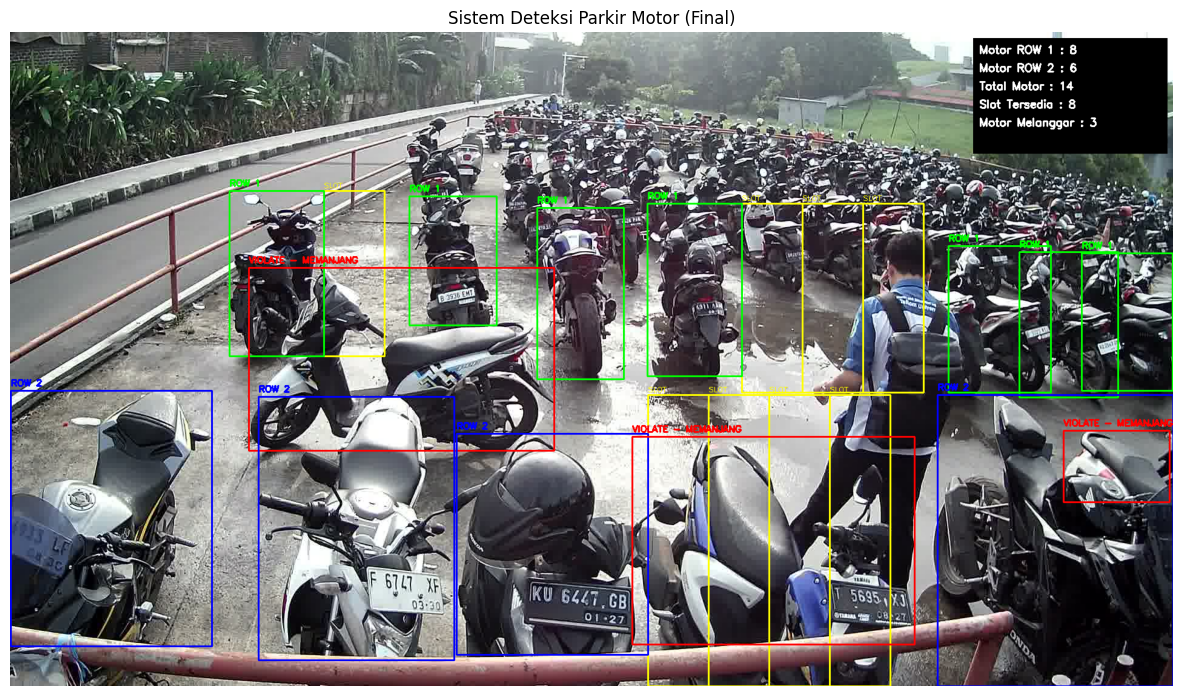

True

In [10]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =============================================================
# KONFIGURASI
# =============================================================
MODEL_PATH = "runs/detect/train2/weights/best.pt"
IMAGE_PATH = "image-test-model/frame5.jpg"

ROW_GAP_THRESHOLD = 50
ASPECT_RATIO_THRESHOLD = 1.2
MIN_SLOT_GAP = 100
SLOT_WIDTH = 100

# =============================================================
# LOAD MODEL & IMAGE
# =============================================================
model = YOLO(MODEL_PATH)
image_files = glob.glob(IMAGE_PATH)
if not image_files:
    raise FileNotFoundError("Tidak ada gambar.")

image_path = image_files[0]
frame = cv2.imread(image_path)

# =============================================================
# YOLO DETECTION
# =============================================================
results = model(frame)[0]

# =============================================================
# EXTRACT MOTOR BOX
# =============================================================
boxes = []
for box in results.boxes:
    cls_id = int(box.cls[0])
    if model.names[cls_id].lower() != "motorcycle":
        continue

    x1, y1, x2, y2 = box.xyxy[0].tolist()
    w, h = x2 - x1, y2 - y1
    ar = w / h if h > 0 else 0

    boxes.append({
        "x1": x1, "y1": y1,
        "x2": x2, "y2": y2,
        "center_y": (y1 + y2) / 2,
        "aspect_ratio": ar,
        "violate_orientation": ar > ASPECT_RATIO_THRESHOLD,
        "violate_between_row": False,
        "is_normal": True
    })

if not boxes:
    print("Tidak ada motor terdeteksi.")
    exit()

# =============================================================
# SPLIT ROW
# =============================================================
boxes = sorted(boxes, key=lambda b: b["y1"])
row1, row2 = [], []

row1.append(boxes[0])
y_ref = boxes[0]["y2"]

for b in boxes[1:]:
    if b["y1"] - y_ref > ROW_GAP_THRESHOLD:
        row2.append(b)
    else:
        row1.append(b)

# =============================================================
# DETEKSI PELANGGARAN ANTAR ROW
# =============================================================
if row1 and row2:
    row1_bottom = max(b["y2"] for b in row1)
    row2_top = min(b["y1"] for b in row2)

    for b in boxes:
        if row1_bottom < b["center_y"] < row2_top:
            b["violate_between_row"] = True

# =============================================================
# TENTUKAN MOTOR NORMAL
# =============================================================
for b in boxes:
    if b["violate_orientation"] or b["violate_between_row"]:
        b["is_normal"] = False

# =============================================================
# DETEKSI SLOT PARKIR (HANYA MOTOR NORMAL)
# =============================================================
def detect_slots(row, frame):
    normal_boxes = [b for b in row if b["is_normal"]]
    slot_count = 0

    if len(normal_boxes) < 2:
        return 0

    normal_boxes = sorted(normal_boxes, key=lambda b: b["x1"])

    for i in range(len(normal_boxes) - 1):
        gap = normal_boxes[i+1]["x1"] - normal_boxes[i]["x2"]

        if gap >= MIN_SLOT_GAP:
            n_slot = int(gap // SLOT_WIDTH)
            slot_count += n_slot

            y1 = int(min(normal_boxes[i]["y1"], normal_boxes[i+1]["y1"]))
            y2 = int(max(normal_boxes[i]["y2"], normal_boxes[i+1]["y2"]))
            start_x = normal_boxes[i]["x2"]

            for s in range(n_slot):
                x1 = int(start_x + s * SLOT_WIDTH)
                x2 = int(x1 + SLOT_WIDTH)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,255), 2)
                cv2.putText(frame, "SLOT", (x1, y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 1)
    return slot_count

slot_row1 = detect_slots(row1, frame)
slot_row2 = detect_slots(row2, frame)

# =============================================================
# VISUALISASI MOTOR
# =============================================================
for b in boxes:
    if b["violate_between_row"]:
        color, label = (0,0,255), "VIOLATE - ANTAR ROW"
    elif b["violate_orientation"]:
        color, label = (0,0,255), "VIOLATE - MEMANJANG"
    elif b in row1:
        color, label = (0,255,0), "ROW 1"
    else:
        color, label = (255,0,0), "ROW 2"

    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), color, 2)
    cv2.putText(frame, label, (int(b["x1"]), int(b["y1"]-8)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# =============================================================
# STATISTIK & LEGENDA
# =============================================================
total_motor = len(boxes)
motor_row1 = len(row1)
motor_row2 = len(row2)
total_slot = slot_row1 + slot_row2
total_violate = sum(1 for b in boxes if not b["is_normal"])

legend_x = frame.shape[1] - 330
cv2.rectangle(frame, (legend_x, 10), (frame.shape[1]-10, 200), (0,0,0), -1)

lines = [
    f"Motor ROW 1 : {motor_row1}",
    f"Motor ROW 2 : {motor_row2}",
    f"Total Motor : {total_motor}",
    f"Slot Tersedia : {total_slot}",
    f"Motor Melanggar : {total_violate}"
]

for i, text in enumerate(lines):
    cv2.putText(frame, text, (legend_x+10, 35 + i*30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

# =============================================================
# DISPLAY & SAVE
# =============================================================
plt.figure(figsize=(15,12))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Sistem Deteksi Parkir Motor (Final)")
plt.show()

os.makedirs("output", exist_ok=True)
cv2.imwrite(f"output/{os.path.basename(image_path)}", frame)



0: 384x640 14 motorcycles, 85.3ms
Speed: 4.4ms preprocess, 85.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


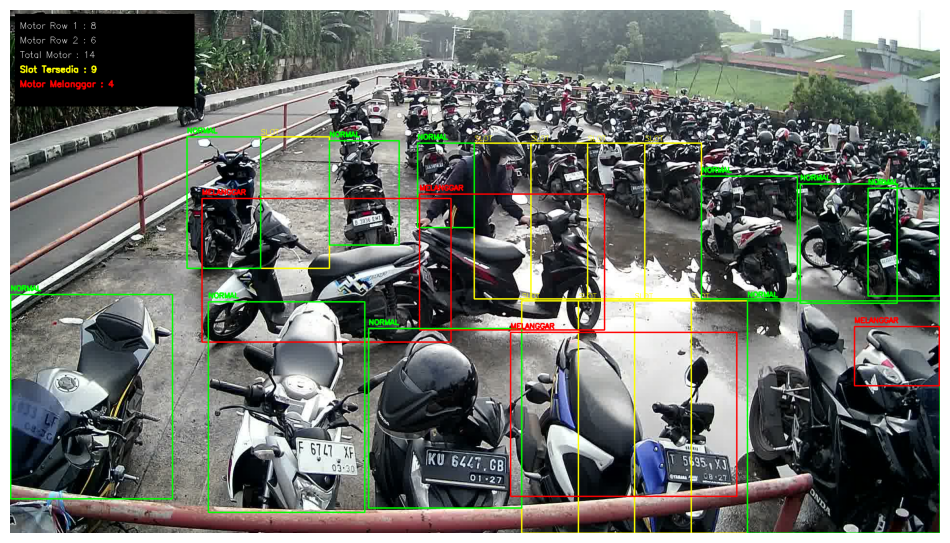

True

In [32]:
import cv2
import glob
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# LOAD MODEL
# =============================================================
model = YOLO("runs/detect/train2/weights/best.pt")

# =============================================================
# LOAD IMAGE
# =============================================================
image_path = glob.glob("image-test-model/frame3.jpg")[0]
frame = cv2.imread(image_path)

# =============================================================
# YOLO PREDICTION
# =============================================================
results = model(frame)[0]

# =============================================================
# EXTRACT MOTOR BOXES
# =============================================================
boxes = []
for box in results.boxes:
    cls = int(box.cls[0])
    if model.names[cls].lower() == "motorcycle":
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        w, h = x2 - x1, y2 - y1
        ar = w / h if h > 0 else 0

        boxes.append({
            "x1": x1, "y1": y1,
            "x2": x2, "y2": y2,
            "w": w, "h": h,
            "ar": ar,
            "center_x": (x1 + x2) / 2,
            "center_y": (y1 + y2) / 2,
            "violate": False
        })

total_motor = len(boxes)
boxes = sorted(boxes, key=lambda b: b["y1"])

# =============================================================
# SPLIT ROW
# =============================================================
THRESHOLD_Y = 50
row1, row2 = [], []

row1.append(boxes[0])
y_ref = boxes[0]["y2"]

for b in boxes[1:]:
    if b["y1"] - y_ref > THRESHOLD_Y:
        row2.append(b)
    else:
        row1.append(b)

# =============================================================
# IOU FUNCTION
# =============================================================
def iou(a, b):
    xi1 = max(a["x1"], b["x1"])
    yi1 = max(a["y1"], b["y1"])
    xi2 = min(a["x2"], b["x2"])
    yi2 = min(a["y2"], b["y2"])

    inter = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    union = (a["w"] * a["h"]) + (b["w"] * b["h"]) - inter
    return inter / union if union > 0 else 0

# =============================================================
# DETECT VIOLATION (FINAL)
# =============================================================
AR_THRESHOLD = 1.2
IOU_THRESHOLD = 0.3

def detect_violation(row):
    normals = []

    # Step 1: Tentukan motor normal awal
    for b in row:
        if b["ar"] < AR_THRESHOLD:
            normals.append(b)

    # Step 2: Evaluasi kandidat pelanggaran
    for b in row:
        if b["ar"] <= AR_THRESHOLD:
            b["violate"] = False
            continue

        overlap_normal = False
        for n in normals:
            if iou(b, n) > IOU_THRESHOLD and abs(b["ar"] - n["ar"]) < 0.2:
                overlap_normal = True
                break

        # POSITIONING CHECK (TIDAK DIHILANGKAN)
        aligned_y = abs(b["center_y"] - np.mean([n["center_y"] for n in normals])) < 40

        if overlap_normal and aligned_y:
            b["violate"] = False
        else:
            b["violate"] = True

# Apply detection
detect_violation(row1)
detect_violation(row2)

# =============================================================
# SLOT DETECTION (ONLY NORMAL)
# =============================================================
def detect_slots(row, frame, min_gap=100):
    normals = [b for b in row if not b["violate"]]
    normals = sorted(normals, key=lambda b: b["x1"])
    slots = 0

    for i in range(len(normals) - 1):
        gap = normals[i+1]["x1"] - normals[i]["x2"]
        if gap >= min_gap:
            count = int(gap // min_gap)
            slots += count

            y1 = int(min(normals[i]["y1"], normals[i+1]["y1"]))
            y2 = int(max(normals[i]["y2"], normals[i+1]["y2"]))
            start = normals[i]["x2"]
            w = gap / count

            for s in range(count):
                x1 = int(start + s * w)
                x2 = int(start + (s + 1) * w)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
                cv2.putText(frame, "SLOT", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)
    return slots

slot_row1 = detect_slots(row1, frame)
slot_row2 = detect_slots(row2, frame)
total_slot = slot_row1 + slot_row2

# =============================================================
# DRAW BOXES
# =============================================================
violation_count = 0

for b in row1 + row2:
    if b["violate"]:
        color = (0, 0, 255)
        label = "MELANGGAR"
        violation_count += 1
    else:
        color = (0, 255, 0)
        label = "NORMAL"

    cv2.rectangle(frame, (int(b["x1"]), int(b["y1"])),
                  (int(b["x2"]), int(b["y2"])), color, 2)
    cv2.putText(frame, label, (int(b["x1"]), int(b["y1"] - 8)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# =============================================================
# LEGEND
# =============================================================
cv2.rectangle(frame, (10, 10), (380, 200), (0, 0, 0), -1)
cv2.putText(frame, f"Motor Row 1 : {len(row1)}", (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
cv2.putText(frame, f"Motor Row 2 : {len(row2)}", (20, 70),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
cv2.putText(frame, f"Total Motor : {total_motor}", (20, 100),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)
cv2.putText(frame, f"Slot Tersedia : {total_slot}", (20, 130),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,255), 2)
cv2.putText(frame, f"Motor Melanggar : {violation_count}", (20, 160),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

# =============================================================
# SHOW & SAVE
# =============================================================
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

os.makedirs("output", exist_ok=True)
cv2.imwrite(f"output/{os.path.basename(image_path)}", frame)


Loading YOLO Model: runs/detect/train2/weights/best.pt...
Processing: image-test-model/frame5.jpg

0: 384x640 14 motorcycles, 85.1ms
Speed: 4.0ms preprocess, 85.1ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


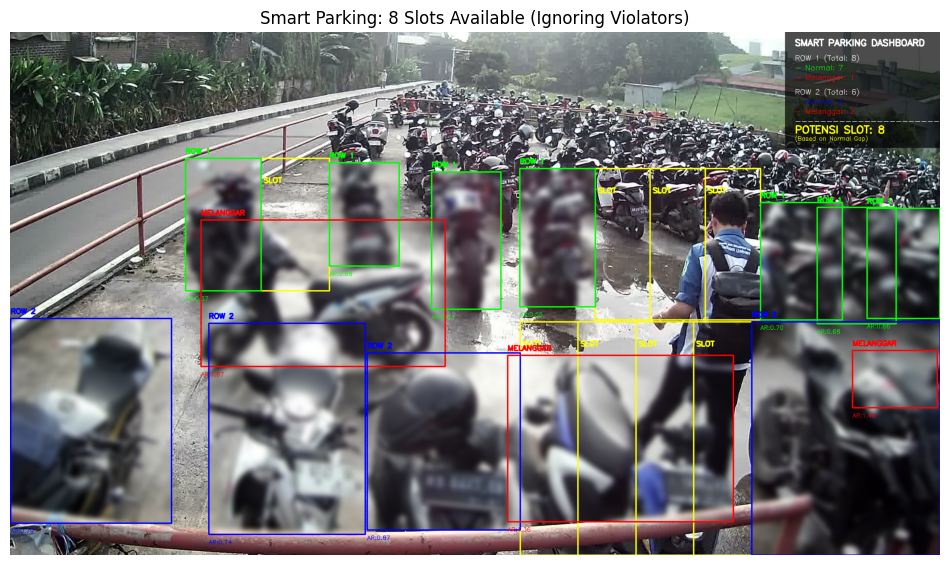


LAPORAN ANALISIS PARKIR
Total Motor     : 14
Potensi Slot    : 8
------------------------------
ROW 1: N=7, V=1, Slot=4
ROW 2: N=4, V=2, Slot=4


In [50]:
import cv2
import glob
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# KONFIGURASI SISTEM
# =============================================================
MODEL_PATH = "runs/detect/train2/weights/best.pt"
IMAGE_DIR = "image-test-model/frame5.jpg"

# Ambang batas pemisah baris (jarak vertikal)
ROW_THRESHOLD = 50 

# Ambang batas pelanggaran (Rasio Lebar : Tinggi)
# > 1.2 dianggap parkir memanjang/salah
VIOLATION_AR_THRESHOLD = 1.2 

# Konfigurasi Slot Parkir
MIN_GAP_FOR_SLOT = 80   # Jarak minimal pixel (sedikit diperkecil agar lebih sensitif)
SLOT_WIDTH_ESTIMATE = 100 # Estimasi lebar 1 motor dalam pixel
BLUR_KERNEL_SIZE = 35   # Kekuatan blur

# Warna Visualisasi (B, G, R)
COLOR_NORMAL_ROW1 = (0, 255, 0)   # Hijau
COLOR_NORMAL_ROW2 = (255, 0, 0)   # Biru
COLOR_VIOLATION   = (0, 0, 255)   # Merah
COLOR_SLOT        = (0, 255, 255) # Kuning

# =============================================================
# FUNGSI BANTUAN (HELPER FUNCTIONS)
# =============================================================

def apply_blur(frame, x1, y1, x2, y2, ksize=35):
    """Memburamkan area motor untuk privasi"""
    roi = frame[y1:y2, x1:x2]
    if roi.size > 0:
        frame[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (ksize, ksize), 0)
    return frame

def calculate_violation(x1, y1, x2, y2):
    """Menentukan apakah motor melanggar berdasarkan Aspect Ratio"""
    width = x2 - x1
    height = y2 - y1
    aspect_ratio = width / height if height > 0 else 0
    is_violation = aspect_ratio > VIOLATION_AR_THRESHOLD
    return is_violation, aspect_ratio, width, height

def detect_and_draw_slots(row_boxes, frame):
    """
    REVISI: Mendeteksi celah kosong HANYA berdasarkan gap antar motor NORMAL.
    Motor yang melanggar akan diabaikan saat perhitungan jarak (dianggap tidak ada),
    sehingga slot yang didudukinya akan terhitung sebagai slot kosong/terbuang.
    """
    slot_count = 0
    
    # FILTER: Ambil hanya motor yang TIDAK melanggar (Normal)
    normal_boxes = [b for b in row_boxes if not b["is_violation"]]

    # Jika referensi motor normal kurang dari 2, tidak bisa hitung gap yang valid
    if len(normal_boxes) < 2:
        return 0

    # Urutkan motor normal dari KIRI ke KANAN
    sorted_row = sorted(normal_boxes, key=lambda b: b["x1"])

    for i in range(len(sorted_row) - 1):
        curr_motor = sorted_row[i]
        next_motor = sorted_row[i + 1]

        # Hitung jarak dari Kanan motor Normal A ke Kiri motor Normal B
        gap = next_motor["x1"] - curr_motor["x2"]

        if gap >= MIN_GAP_FOR_SLOT:
            # Hitung berapa motor yang muat di celah tersebut
            num_slots = int(gap // SLOT_WIDTH_ESTIMATE)
            slot_count += num_slots

            # Koordinat visualisasi slot
            # Kita ambil rata-rata Y dari kedua motor normal sebagai acuan tinggi slot
            y1 = int(min(curr_motor["y1"], next_motor["y1"]))
            y2 = int(max(curr_motor["y2"], next_motor["y2"]))
            start_x = curr_motor["x2"]
            slot_w_actual = gap / num_slots

            for s in range(num_slots):
                sx1 = int(start_x + s * slot_w_actual)
                sx2 = int(start_x + (s + 1) * slot_w_actual)
                
                # Gambar kotak slot (Kuning Putus-putus Style simulasi)
                # Note: OpenCV tidak support putus-putus native di rectangle, jadi kita pakai solid line
                cv2.rectangle(frame, (sx1, y1), (sx2, y2), COLOR_SLOT, 2)
                
                # Label Slot
                cv2.putText(frame, "SLOT", (sx1 + 5, y1 + 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_SLOT, 2)
    
    return slot_count

def draw_dashboard(frame, total, r1_stats, r2_stats, total_slots):
    """Membuat tampilan statistik di pojok kanan atas"""
    h, w, _ = frame.shape
    
    # Overlay Background
    overlay = frame.copy()
    cv2.rectangle(overlay, (w - 320, 0), (w, 240), (0, 0, 0), -1)
    alpha = 0.7
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    # Text Settings
    font = cv2.FONT_HERSHEY_SIMPLEX
    white = (255, 255, 255)
    x_pos = w - 300
    
    cv2.putText(frame, "SMART PARKING DASHBOARD", (x_pos, 30), font, 0.6, white, 2)
    
    # Row 1 Stats
    cv2.putText(frame, f"ROW 1 (Total: {r1_stats['count']})", (x_pos, 60), font, 0.5, white, 1)
    cv2.putText(frame, f"- Normal: {r1_stats['normal']}", (x_pos, 80), font, 0.5, COLOR_NORMAL_ROW1, 1)
    cv2.putText(frame, f"- Melanggar: {r1_stats['violation']}", (x_pos, 100), font, 0.5, COLOR_VIOLATION, 1)
    
    # Row 2 Stats
    cv2.putText(frame, f"ROW 2 (Total: {r2_stats['count']})", (x_pos, 130), font, 0.5, white, 1)
    cv2.putText(frame, f"- Normal: {r2_stats['normal']}", (x_pos, 150), font, 0.5, COLOR_NORMAL_ROW2, 1)
    cv2.putText(frame, f"- Melanggar: {r2_stats['violation']}", (x_pos, 170), font, 0.5, COLOR_VIOLATION, 1)

    # Slot Stats
    cv2.putText(frame, "-"*25, (x_pos, 190), font, 0.5, white, 1)
    cv2.putText(frame, f"POTENSI SLOT: {total_slots}", (x_pos, 210), font, 0.7, COLOR_SLOT, 2)
    cv2.putText(frame, "(Based on Normal Gap)", (x_pos, 225), font, 0.4, COLOR_SLOT, 1)

# =============================================================
# MAIN PROGRAM
# =============================================================
def main():
    # 1. Load Model
    print(f"Loading YOLO Model: {MODEL_PATH}...")
    try:
        model = YOLO(MODEL_PATH)
    except Exception as e:
        print(f"Error loading model: {e}")
        return

    # 2. Load Image
    image_files = glob.glob(IMAGE_DIR)
    if len(image_files) == 0:
        raise FileNotFoundError("Tidak ada file .jpg di folder image-test-model/")
    
    image_path = image_files[0] 
    frame = cv2.imread(image_path)
    print(f"Processing: {image_path}")

    # 3. Predict
    results = model(frame)[0]
    
    # 4. Filter & Process Objects
    processed_boxes = []
    
    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        
        # FILTER: Hanya ambil Motorcycle
        if cls_name.lower() == "motorcycle":
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            
            # CEK PELANGGARAN
            is_violation, ar, w, h = calculate_violation(x1, y1, x2, y2)
            
            # BLUR MOTOR (Privasi)
            frame = apply_blur(frame, x1, y1, x2, y2, ksize=BLUR_KERNEL_SIZE)
            
            processed_boxes.append({
                "x1": x1, "y1": y1, "x2": x2, "y2": y2,
                "ar": ar, "is_violation": is_violation,
                "width": w, "height": h
            })

    if not processed_boxes:
        print("Tidak ada motor terdeteksi.")
        return

    # 5. Row Separation Logic
    # Urutkan berdasarkan posisi Y (atas ke bawah)
    processed_boxes = sorted(processed_boxes, key=lambda b: b["y1"])
    
    row1 = []
    row2 = []
    
    # Ambil motor pertama sebagai referensi Row 1
    row1.append(processed_boxes[0])
    y_ref = processed_boxes[0]["y2"]
    
    for b in processed_boxes[1:]:
        gap = b["y1"] - y_ref
        if gap > ROW_THRESHOLD:
            row2.append(b)
        else:
            row1.append(b)

    # 6. Slot Detection Logic (REVISI: Hanya Gap Motor Normal)
    # Fungsi ini akan menggambar kotak kuning di frame
    slots_r1 = detect_and_draw_slots(row1, frame)
    slots_r2 = detect_and_draw_slots(row2, frame)
    total_slots = slots_r1 + slots_r2

    # 7. Visualization Logic (Menggambar Kotak Motor)
    def draw_motor_boxes(motor_list, row_name, normal_color):
        normal_count = 0
        violation_count = 0
        
        for b in motor_list:
            if b["is_violation"]:
                color = COLOR_VIOLATION
                label = "MELANGGAR"
                violation_count += 1
            else:
                color = normal_color
                label = row_name
                normal_count += 1
            
            # Gambar Kotak
            cv2.rectangle(frame, (b["x1"], b["y1"]), (b["x2"], b["y2"]), color, 2)
            
            # Label & Aspect Ratio
            cv2.putText(frame, f"{label}", (b["x1"], b["y1"] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(frame, f"AR:{b['ar']:.2f}", (b["x1"], b["y2"] + 20), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)
            
        return {"count": len(motor_list), "normal": normal_count, "violation": violation_count}

    stats_r1 = draw_motor_boxes(row1, "ROW 1", COLOR_NORMAL_ROW1)
    stats_r2 = draw_motor_boxes(row2, "ROW 2", COLOR_NORMAL_ROW2)

    # 8. Draw Dashboard
    draw_dashboard(frame, len(processed_boxes), stats_r1, stats_r2, total_slots)

    # 9. Output & Saving
    plt.figure(figsize=(12, 10))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Smart Parking: {total_slots} Slots Available (Ignoring Violators)")
    plt.show()

    os.makedirs("output", exist_ok=True)
    filename = os.path.basename(image_path)
    save_path = f"output/REVISI_{filename}"
    cv2.imwrite(save_path, frame)
    
    # 10. Terminal Log
    print("\n" + "="*50)
    print("LAPORAN ANALISIS PARKIR")
    print("="*50)
    print(f"Total Motor     : {len(processed_boxes)}")
    print(f"Potensi Slot    : {total_slots}")
    print("-" * 30)
    print(f"ROW 1: N={stats_r1['normal']}, V={stats_r1['violation']}, Slot={slots_r1}")
    print(f"ROW 2: N={stats_r2['normal']}, V={stats_r2['violation']}, Slot={slots_r2}")
    print("="*50)

if __name__ == "__main__":
    main()

In [6]:
import cv2
import glob
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# KONFIGURASI SISTEM
# =============================================================
MODEL_PATH = "runs/detect/train2/weights/best.pt"
IMAGE_DIR_PATTERN = "image-test-model/*.jpg" 
OUTPUT_DIR = "output_batch_result"

ROW_THRESHOLD = 50 
VIOLATION_AR_THRESHOLD = 1.2 
MIN_GAP_FOR_SLOT = 80
SLOT_WIDTH_ESTIMATE = 100 
BLUR_KERNEL_SIZE = 35

# Warna
COLOR_NORMAL_ROW1 = (0, 255, 0)
COLOR_NORMAL_ROW2 = (255, 0, 0)
COLOR_VIOLATION   = (0, 0, 255)
COLOR_SLOT        = (0, 255, 255)

# =============================================================
# FUNGSI BANTUAN
# =============================================================
def apply_blur(frame, x1, y1, x2, y2, ksize=35):
    roi = frame[y1:y2, x1:x2]
    if roi.size > 0:
        frame[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (ksize, ksize), 0)
    return frame

def calculate_violation(x1, y1, x2, y2):
    width = x2 - x1
    height = y2 - y1
    aspect_ratio = width / height if height > 0 else 0
    is_violation = aspect_ratio > VIOLATION_AR_THRESHOLD
    return is_violation, aspect_ratio, width, height

def get_valid_widths(row_boxes):
    """Mengambil list lebar motor HANYA untuk motor NORMAL"""
    return [b["width"] for b in row_boxes if not b["is_violation"]]

def get_valid_aspect_ratios(row_boxes):
    """(BARU) Mengambil list Aspect Ratio HANYA untuk motor NORMAL"""
    return [b["ar"] for b in row_boxes if not b["is_violation"]]

def calculate_avg_from_list(data_list):
    """Menghitung rata-rata dari list angka"""
    if len(data_list) == 0: return 0.0
    return sum(data_list) / len(data_list)

def detect_and_draw_slots(row_boxes, frame):
    slot_count = 0
    normal_boxes = [b for b in row_boxes if not b["is_violation"]]
    if len(normal_boxes) < 2: return 0

    sorted_row = sorted(normal_boxes, key=lambda b: b["x1"])
    for i in range(len(sorted_row) - 1):
        curr_motor = sorted_row[i]
        next_motor = sorted_row[i + 1]
        gap = next_motor["x1"] - curr_motor["x2"]

        if gap >= MIN_GAP_FOR_SLOT:
            num_slots = int(gap // SLOT_WIDTH_ESTIMATE)
            if num_slots < 1: num_slots = 1 # Guard clause

            slot_count += num_slots
            y1 = int(min(curr_motor["y1"], next_motor["y1"]))
            y2 = int(max(curr_motor["y2"], next_motor["y2"]))
            start_x = curr_motor["x2"]
            slot_w_actual = gap / num_slots

            for s in range(num_slots):
                sx1 = int(start_x + s * slot_w_actual)
                sx2 = int(start_x + (s + 1) * slot_w_actual)
                cv2.rectangle(frame, (sx1, y1), (sx2, y2), COLOR_SLOT, 2)
                cv2.putText(frame, "SLOT", (sx1 + 5, y1 + 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_SLOT, 2)
    return slot_count

def draw_dashboard(frame, filename, r1_stats, r2_stats, total_slots, avg_w1, avg_w2):
    h, w, _ = frame.shape
    overlay = frame.copy()
    cv2.rectangle(overlay, (w - 350, 0), (w, 280), (0, 0, 0), -1)
    alpha = 0.7
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    font = cv2.FONT_HERSHEY_SIMPLEX
    white = (255, 255, 255)
    x_pos = w - 330
    
    cv2.putText(frame, f"FILE: {filename}", (x_pos, 30), font, 0.5, white, 1)
    
    cv2.putText(frame, f"ROW 1 (Total: {r1_stats['count']})", (x_pos, 60), font, 0.5, white, 1)
    cv2.putText(frame, f"- Avg Width: {avg_w1:.1f} px", (x_pos, 80), font, 0.5, COLOR_SLOT, 1)
    cv2.putText(frame, f"- Normal: {r1_stats['normal']}", (x_pos, 100), font, 0.5, COLOR_NORMAL_ROW1, 1)
    cv2.putText(frame, f"- Melanggar: {r1_stats['violation']}", (x_pos, 120), font, 0.5, COLOR_VIOLATION, 1)
    
    cv2.putText(frame, f"ROW 2 (Total: {r2_stats['count']})", (x_pos, 150), font, 0.5, white, 1)
    cv2.putText(frame, f"- Avg Width: {avg_w2:.1f} px", (x_pos, 170), font, 0.5, COLOR_SLOT, 1)
    cv2.putText(frame, f"- Normal: {r2_stats['normal']}", (x_pos, 190), font, 0.5, COLOR_NORMAL_ROW2, 1)
    cv2.putText(frame, f"- Melanggar: {r2_stats['violation']}", (x_pos, 210), font, 0.5, COLOR_VIOLATION, 1)

    cv2.putText(frame, "-"*25, (x_pos, 230), font, 0.5, white, 1)
    cv2.putText(frame, f"SLOT KOSONG: {total_slots}", (x_pos, 250), font, 0.7, COLOR_SLOT, 2)

def draw_motor_boxes(frame, motor_list, row_name, normal_color):
    normal_count = 0
    violation_count = 0
    for b in motor_list:
        if b["is_violation"]:
            color = COLOR_VIOLATION
            label = "MELANGGAR"
            violation_count += 1
        else:
            color = normal_color
            label = row_name
            normal_count += 1
        
        cv2.rectangle(frame, (b["x1"], b["y1"]), (b["x2"], b["y2"]), color, 2)
        cv2.putText(frame, f"{label}", (b["x1"], b["y1"] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    return {"count": len(motor_list), "normal": normal_count, "violation": violation_count}

# =============================================================
# LOGIKA PROSES PER GAMBAR
# =============================================================
def process_image(model, image_path):
    filename = os.path.basename(image_path)
    print(f"[{filename}] Memproses...", end=" ")
    
    frame = cv2.imread(image_path)
    if frame is None:
        print("ERROR: Gagal membaca file")
        return [], [], [], [] # Return 4 list kosong

    # 1. Predict
    results = model(frame)[0]
    processed_boxes = []

    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        
        if cls_name.lower() == "motorcycle":
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            is_violation, ar, w, h = calculate_violation(x1, y1, x2, y2)
            frame = apply_blur(frame, x1, y1, x2, y2, ksize=BLUR_KERNEL_SIZE)
            
            processed_boxes.append({
                "x1": x1, "y1": y1, "x2": x2, "y2": y2,
                "ar": ar, "is_violation": is_violation,
                "width": w, "height": h
            })

    if not processed_boxes:
        print("-> Tidak ada motor.")
        cv2.imwrite(os.path.join(OUTPUT_DIR, filename), frame)
        return [], [], [], []

    # 2. Row Sorting
    processed_boxes = sorted(processed_boxes, key=lambda b: b["y1"])
    row1, row2 = [], []
    row1.append(processed_boxes[0])
    y_ref = processed_boxes[0]["y2"]
    
    for b in processed_boxes[1:]:
        if (b["y1"] - y_ref) > ROW_THRESHOLD:
            row2.append(b)
        else:
            row1.append(b)

    # 3. Collect Data (Width & Aspect Ratio)
    widths_r1 = get_valid_widths(row1)
    widths_r2 = get_valid_widths(row2)
    
    # --- PENGAMBILAN DATA AR DI SINI ---
    ar_r1 = get_valid_aspect_ratios(row1)
    ar_r2 = get_valid_aspect_ratios(row2)
    # -----------------------------------

    # 4. Local Calculation & Visualization
    avg_w1_local = calculate_avg_from_list(widths_r1)
    avg_w2_local = calculate_avg_from_list(widths_r2)
    slots_r1 = detect_and_draw_slots(row1, frame)
    slots_r2 = detect_and_draw_slots(row2, frame)
    total_slots = slots_r1 + slots_r2

    stats_r1 = draw_motor_boxes(frame, row1, "ROW 1", COLOR_NORMAL_ROW1)
    stats_r2 = draw_motor_boxes(frame, row2, "ROW 2", COLOR_NORMAL_ROW2)
    draw_dashboard(frame, filename, stats_r1, stats_r2, total_slots, avg_w1_local, avg_w2_local)

    # 5. Save & Log
    cv2.imwrite(os.path.join(OUTPUT_DIR, filename), frame)
    print(f"-> Selesai. (Avg Local Width: R1={avg_w1_local:.1f}, R2={avg_w2_local:.1f})")

    # KEMBALIKAN 4 DATA: Width R1, Width R2, AR R1, AR R2
    return widths_r1, widths_r2, ar_r1, ar_r2

# =============================================================
# MAIN PROGRAM (GLOBAL AVG)
# =============================================================
def main():
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    print(f"Loading Model: {MODEL_PATH}...")
    try:
        model = YOLO(MODEL_PATH)
    except Exception as e:
        print(f"Error: {e}")
        return

    image_files = glob.glob(IMAGE_DIR_PATTERN)
    if not image_files:
        print(f"Tidak ada file .jpg di {IMAGE_DIR_PATTERN}")
        return

    print(f"Ditemukan {len(image_files)} gambar. Memulai proses...")
    print("="*60)

    # === VARIABEL PENAMPUNG DATA GLOBAL ===
    global_widths_r1 = []
    global_widths_r2 = []
    global_ar_r1 = []
    global_ar_r2 = []

    for img_path in image_files:
        # Tangkap 4 kembalian dari fungsi
        w1, w2, ar1, ar2 = process_image(model, img_path)
        
        global_widths_r1.extend(w1)
        global_widths_r2.extend(w2)
        global_ar_r1.extend(ar1)
        global_ar_r2.extend(ar2)

    print("\n" + "="*60)
    print("HASIL ANALISIS GLOBAL (KESELURUHAN FRAME)")
    print("="*60)
    
    # --- LAPORAN ROW 1 ---
    print(f"ROW 1 (Depan):")
    if len(global_widths_r1) > 0:
        avg_w = sum(global_widths_r1) / len(global_widths_r1)
        avg_ar = sum(global_ar_r1) / len(global_ar_r1)
        print(f"  - Total Sampel Normal : {len(global_widths_r1)}")
        print(f"  - Avg LEBAR (Width)   : {avg_w:.2f} pixel")
        print(f"  - Avg ASPECT RATIO    : {avg_ar:.3f}")
    else:
        print("  - Tidak ada data motor normal.")

    print("-" * 30)

    # --- LAPORAN ROW 2 ---
    print(f"ROW 2 (Belakang):")
    if len(global_widths_r2) > 0:
        avg_w = sum(global_widths_r2) / len(global_widths_r2)
        avg_ar = sum(global_ar_r2) / len(global_ar_r2)
        print(f"  - Total Sampel Normal : {len(global_widths_r2)}")
        print(f"  - Avg LEBAR (Width)   : {avg_w:.2f} pixel")
        print(f"  - Avg ASPECT RATIO    : {avg_ar:.3f}")
    else:
        print("  - Tidak ada data motor normal.")

    print("="*60)
    print(f"Cek hasil gambar di folder '{OUTPUT_DIR}'")

if __name__ == "__main__":
    main()

Loading Model: runs/detect/train2/weights/best.pt...
Ditemukan 516 gambar. Memulai proses...
[1-frame_0001.jpg] Memproses... 
0: 384x640 15 motorcycles, 86.9ms
Speed: 7.1ms preprocess, 86.9ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai. (Avg Local Width: R1=180.0, R2=306.1)
[1-frame_0002.jpg] Memproses... 
0: 384x640 18 motorcycles, 79.8ms
Speed: 3.6ms preprocess, 79.8ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai. (Avg Local Width: R1=189.1, R2=295.1)
[1-frame_0003.jpg] Memproses... 
0: 384x640 16 motorcycles, 70.1ms
Speed: 3.6ms preprocess, 70.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai. (Avg Local Width: R1=183.7, R2=329.0)
[1-frame_0004.jpg] Memproses... 
0: 384x640 18 motorcycles, 66.2ms
Speed: 4.7ms preprocess, 66.2ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai. (Avg Local Width: R1=158.8, R2=299.9)
[1-frame_0005.jpg] Memproses... 
0: 384x640 18 moto

In [7]:
import cv2
import glob
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# KONFIGURASI SISTEM
# =============================================================
MODEL_PATH = "runs/detect/train2/weights/best.pt"
IMAGE_DIR_PATTERN = "image-test-model/*.jpg" 
OUTPUT_DIR = "output"

ROW_THRESHOLD = 50 
VIOLATION_AR_THRESHOLD = 1.2 
MIN_GAP_FOR_SLOT = 80
SLOT_WIDTH_ESTIMATE = 100 
BLUR_KERNEL_SIZE = 35

# Warna
COLOR_NORMAL_ROW1 = (0, 255, 0)
COLOR_NORMAL_ROW2 = (255, 0, 0)
COLOR_VIOLATION   = (0, 0, 255)
COLOR_SLOT        = (0, 255, 255)

# =============================================================
# FUNGSI BANTUAN
# =============================================================
def apply_blur(frame, x1, y1, x2, y2, ksize=35):
    roi = frame[y1:y2, x1:x2]
    if roi.size > 0:
        frame[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (ksize, ksize), 0)
    return frame

def calculate_violation(x1, y1, x2, y2):
    width = x2 - x1
    height = y2 - y1
    aspect_ratio = width / height if height > 0 else 0
    is_violation = aspect_ratio > VIOLATION_AR_THRESHOLD
    return is_violation, aspect_ratio, width, height

def get_valid_data(row_boxes):
    """
    Mengambil pasangan data {'width': w, 'ar': ar} 
    HANYA untuk motor NORMAL (tidak melanggar).
    """
    return [{"width": b["width"], "ar": b["ar"]} for b in row_boxes if not b["is_violation"]]

def detect_and_draw_slots(row_boxes, frame):
    slot_count = 0
    normal_boxes = [b for b in row_boxes if not b["is_violation"]]
    if len(normal_boxes) < 2: return 0

    sorted_row = sorted(normal_boxes, key=lambda b: b["x1"])
    for i in range(len(sorted_row) - 1):
        curr_motor = sorted_row[i]
        next_motor = sorted_row[i + 1]
        gap = next_motor["x1"] - curr_motor["x2"]

        if gap >= MIN_GAP_FOR_SLOT:
            num_slots = int(gap // SLOT_WIDTH_ESTIMATE)
            if num_slots < 1: num_slots = 1

            slot_count += num_slots
            y1 = int(min(curr_motor["y1"], next_motor["y1"]))
            y2 = int(max(curr_motor["y2"], next_motor["y2"]))
            start_x = curr_motor["x2"]
            slot_w_actual = gap / num_slots

            for s in range(num_slots):
                sx1 = int(start_x + s * slot_w_actual)
                sx2 = int(start_x + (s + 1) * slot_w_actual)
                cv2.rectangle(frame, (sx1, y1), (sx2, y2), COLOR_SLOT, 2)
                cv2.putText(frame, "SLOT", (sx1 + 5, y1 + 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_SLOT, 2)
    return slot_count

def draw_dashboard(frame, filename, r1_stats, r2_stats, total_slots):
    h, w, _ = frame.shape
    overlay = frame.copy()
    cv2.rectangle(overlay, (w - 300, 0), (w, 250), (0, 0, 0), -1)
    alpha = 0.7
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    font = cv2.FONT_HERSHEY_SIMPLEX
    white = (255, 255, 255)
    x_pos = w - 280
    
    cv2.putText(frame, f"FILE: {filename}", (x_pos, 30), font, 0.5, white, 1)
    
    cv2.putText(frame, f"ROW 1: {r1_stats['count']} Motor", (x_pos, 60), font, 0.5, white, 1)
    cv2.putText(frame, f"Normal: {r1_stats['normal']}", (x_pos, 80), font, 0.5, COLOR_NORMAL_ROW1, 1)
    cv2.putText(frame, f"Langgar: {r1_stats['violation']}", (x_pos, 100), font, 0.5, COLOR_VIOLATION, 1)
    
    cv2.putText(frame, f"ROW 2: {r2_stats['count']} Motor", (x_pos, 130), font, 0.5, white, 1)
    cv2.putText(frame, f"Normal: {r2_stats['normal']}", (x_pos, 150), font, 0.5, COLOR_NORMAL_ROW2, 1)
    cv2.putText(frame, f"Langgar: {r2_stats['violation']}", (x_pos, 170), font, 0.5, COLOR_VIOLATION, 1)

    cv2.putText(frame, "-"*25, (x_pos, 190), font, 0.5, white, 1)
    cv2.putText(frame, f"SLOT KOSONG: {total_slots}", (x_pos, 210), font, 0.7, COLOR_SLOT, 2)

def draw_motor_boxes(frame, motor_list, row_name, normal_color):
    normal_count = 0
    violation_count = 0
    for b in motor_list:
        if b["is_violation"]:
            color = COLOR_VIOLATION
            label = "MELANGGAR"
            violation_count += 1
        else:
            color = normal_color
            label = row_name
            normal_count += 1
        
        cv2.rectangle(frame, (b["x1"], b["y1"]), (b["x2"], b["y2"]), color, 2)
        cv2.putText(frame, f"{label}", (b["x1"], b["y1"] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    return {"count": len(motor_list), "normal": normal_count, "violation": violation_count}

# =============================================================
# LOGIKA PROSES PER GAMBAR
# =============================================================
def process_image(model, image_path):
    filename = os.path.basename(image_path)
    print(f"[{filename}] Memproses...", end=" ")
    
    frame = cv2.imread(image_path)
    if frame is None:
        print("ERROR: Gagal membaca file")
        return [], [] 

    results = model(frame)[0]
    processed_boxes = []

    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        
        if cls_name.lower() == "motorcycle":
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            is_violation, ar, w, h = calculate_violation(x1, y1, x2, y2)
            frame = apply_blur(frame, x1, y1, x2, y2, ksize=BLUR_KERNEL_SIZE)
            
            processed_boxes.append({
                "x1": x1, "y1": y1, "x2": x2, "y2": y2,
                "ar": ar, "is_violation": is_violation,
                "width": w, "height": h
            })

    if not processed_boxes:
        print("-> Tidak ada motor.")
        cv2.imwrite(os.path.join(OUTPUT_DIR, filename), frame)
        return [], []

    # Sorting
    processed_boxes = sorted(processed_boxes, key=lambda b: b["y1"])
    row1, row2 = [], []
    row1.append(processed_boxes[0])
    y_ref = processed_boxes[0]["y2"]
    
    for b in processed_boxes[1:]:
        if (b["y1"] - y_ref) > ROW_THRESHOLD:
            row2.append(b)
        else:
            row1.append(b)

    # Visualization
    slots_r1 = detect_and_draw_slots(row1, frame)
    slots_r2 = detect_and_draw_slots(row2, frame)
    total_slots = slots_r1 + slots_r2

    stats_r1 = draw_motor_boxes(frame, row1, "ROW 1", COLOR_NORMAL_ROW1)
    stats_r2 = draw_motor_boxes(frame, row2, "ROW 2", COLOR_NORMAL_ROW2)
    draw_dashboard(frame, filename, stats_r1, stats_r2, total_slots)

    cv2.imwrite(os.path.join(OUTPUT_DIR, filename), frame)
    print("-> Selesai.")

    # RETURN DATA STRUCTURED (Hanya Normal)
    # Kita kirim width dan ar dalam satu paket untuk diproses di Main
    data_r1 = get_valid_data(row1)
    data_r2 = get_valid_data(row2)

    return data_r1, data_r2

# =============================================================
# MAIN PROGRAM (PERHITUNGAN LOGIKA BARU)
# =============================================================
def main():
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    print(f"Loading Model: {MODEL_PATH}...")
    try:
        model = YOLO(MODEL_PATH)
    except Exception as e:
        print(f"Error: {e}")
        return

    image_files = glob.glob(IMAGE_DIR_PATTERN)
    if not image_files:
        print(f"Tidak ada file .jpg di {IMAGE_DIR_PATTERN}")
        return

    print(f"Ditemukan {len(image_files)} gambar. Memulai proses...")
    print("="*60)

    # Penampung Data Global (List of Dictionary)
    global_data_r1 = []
    global_data_r2 = []

    # 1. LOOPING UTAMA (Mengumpulkan Data)
    for img_path in image_files:
        d1, d2 = process_image(model, img_path)
        global_data_r1.extend(d1)
        global_data_r2.extend(d2)

    # =========================================================
    # LOGIKA KHUSUS: REFINED AVERAGE WIDTH CALCULATION
    # =========================================================
    
    def calculate_refined_stats(motor_data_list, row_name):
        """
        Menghitung Rata-rata Lebar dengan syarat:
        Width dihitung HANYA jika Aspect Ratio <= Rata-rata Aspect Ratio Row tsb
        """
        if not motor_data_list:
            print(f"{row_name}: Tidak ada data.")
            return

        # Langkah 1: Hitung Rata-rata Aspect Ratio Global untuk Row ini
        all_ar = [d['ar'] for d in motor_data_list]
        avg_ar_global = sum(all_ar) / len(all_ar)

        # Langkah 2: Filter Data
        # Ambil width HANYA jika aspect_ratio motor tersebut <= avg_ar_global
        refined_widths = [d['width'] for d in motor_data_list if d['ar'] <= avg_ar_global]

        # Langkah 3: Hitung Rata-rata Width Baru (Refined)
        if refined_widths:
            refined_avg_width = sum(refined_widths) / len(refined_widths)
        else:
            refined_avg_width = 0

        # Output Laporan
        print(f"{row_name}:")
        print(f"  - Total Sampel Normal     : {len(motor_data_list)}")
        print(f"  - Rata-rata Aspect Ratio  : {avg_ar_global:.3f}")
        print(f"  - Sampel setelah Filter   : {len(refined_widths)} (AR <= {avg_ar_global:.3f})")
        print(f"  - REFINED AVG WIDTH       : {refined_avg_width:.2f} pixel")
        print("-" * 40)

    print("\n" + "="*60)
    print("HASIL ANALISIS GLOBAL (LOGIKA REFINED)")
    print("="*60)
    
    calculate_refined_stats(global_data_r1, "ROW 1 (Depan)")
    calculate_refined_stats(global_data_r2, "ROW 2 (Belakang)")

    print("="*60)
    print(f"Cek hasil gambar di folder '{OUTPUT_DIR}'")

if __name__ == "__main__":
    main()

Loading Model: runs/detect/train2/weights/best.pt...
Ditemukan 516 gambar. Memulai proses...
[1-frame_0001.jpg] Memproses... 
0: 384x640 15 motorcycles, 90.0ms
Speed: 5.4ms preprocess, 90.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai.
[1-frame_0002.jpg] Memproses... 
0: 384x640 18 motorcycles, 78.2ms
Speed: 3.6ms preprocess, 78.2ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai.
[1-frame_0003.jpg] Memproses... 
0: 384x640 16 motorcycles, 68.1ms
Speed: 3.4ms preprocess, 68.1ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai.
[1-frame_0004.jpg] Memproses... 
0: 384x640 18 motorcycles, 70.1ms
Speed: 3.3ms preprocess, 70.1ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai.
[1-frame_0005.jpg] Memproses... 
0: 384x640 18 motorcycles, 68.3ms
Speed: 3.2ms preprocess, 68.3ms inference, 7.7ms postprocess per image at shape (1, 3, 384, 640)
-> Selesai.
[1-frame_0006.jpg] Memprose

In [14]:
import cv2
import glob
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================================================
# KONFIGURASI SISTEM (FINAL)
# =============================================================
MODEL_PATH = "runs/detect/train2/weights/best.pt"
IMAGE_DIR_PATTERN = "image-test-model/*.jpg" 
OUTPUT_DIR = "output_final_system"

# Konstanta Hasil Analisis Sebelumnya
ROW1_SLOT_THRESHOLD = 157  # Ambang batas lebar slot Row 1 (Depan)
ROW2_SLOT_THRESHOLD = 214  # Ambang batas lebar slot Row 2 (Belakang)

# Konfigurasi Lain
ROW_THRESHOLD = 50          # Pemisah vertikal baris
VIOLATION_AR_THRESHOLD = 1.2 # Batas pelanggaran parkir memanjang
# BLUR_KERNEL_SIZE = 35      # Kekuatan blur privasi

# Warna Visualisasi (B, G, R)
COLOR_NORMAL_ROW1 = (0, 255, 0)   # Hijau
COLOR_NORMAL_ROW2 = (255, 0, 0)   # Biru
COLOR_VIOLATION   = (0, 0, 255)   # Merah
COLOR_SLOT        = (0, 255, 255) # Kuning

# =============================================================
# FUNGSI BANTUAN
# =============================================================

# def apply_blur(frame, x1, y1, x2, y2, ksize=35):
#     """Efek blur pada motor untuk privasi"""
#     roi = frame[y1:y2, x1:x2]
#     if roi.size > 0:
#         frame[y1:y2, x1:x2] = cv2.GaussianBlur(roi, (ksize, ksize), 0)
#     return frame

def calculate_violation(x1, y1, x2, y2):
    """Cek apakah motor parkir memanjang (melanggar)"""
    width = x2 - x1
    height = y2 - y1
    aspect_ratio = width / height if height > 0 else 0
    is_violation = aspect_ratio > VIOLATION_AR_THRESHOLD
    return is_violation, aspect_ratio

def detect_and_draw_slots(row_boxes, frame, slot_threshold):
    """
    LOGIKA BARU:
    1. Min Gap = slot_threshold (157px atau 214px).
    2. Jika Gap < Threshold, abaikan.
    3. Jika Gap >= Threshold, hitung berapa slot muat.
    4. Lebar visualisasi slot = Gap dibagi jumlah slot (Full Width).
    """
    slot_count = 0
    
    # Filter: Abaikan motor yang melanggar saat menghitung gap
    normal_boxes = [b for b in row_boxes if not b["is_violation"]]

    # Butuh minimal 2 motor untuk ada 'gap' di antaranya
    if len(normal_boxes) < 2:
        return 0

    # Urutkan motor dari kiri ke kanan
    sorted_row = sorted(normal_boxes, key=lambda b: b["x1"])

    for i in range(len(sorted_row) - 1):
        curr_motor = sorted_row[i]
        next_motor = sorted_row[i + 1]

        # Hitung Gap
        gap = next_motor["x1"] - curr_motor["x2"]

        # Cek apakah gap memenuhi standar minimal row tersebut
        if gap >= slot_threshold:
            # Hitung jumlah slot (misal: 320 // 157 = 2 slot)
            num_slots = int(gap // slot_threshold)
            
            # Guard: minimal 1 slot jika logic gap lolos
            if num_slots < 1: 
                num_slots = 1

            slot_count += num_slots
            
            # Koordinat Y (tinggi slot mengikuti motor sampingnya)
            y1 = int(min(curr_motor["y1"], next_motor["y1"]))
            y2 = int(max(curr_motor["y2"], next_motor["y2"]))
            
            # Koordinat X Awal
            start_x = curr_motor["x2"]
            
            # === LOGIKA ELASTIS ===
            # "buat 1 slot saja penuh selebar gapnya" 
            # Rumus ini otomatis membagi rata sisa gap ke slot yang ada
            slot_w_actual = gap / num_slots 

            for s in range(num_slots):
                sx1 = int(start_x + s * slot_w_actual)
                sx2 = int(start_x + (s + 1) * slot_w_actual)
                
                # Visualisasi Kotak Slot
                cv2.rectangle(frame, (sx1, y1), (sx2, y2), COLOR_SLOT, 2)
                
                # Label
                label = f"SLOT ({int(slot_w_actual)}px)"
                cv2.putText(frame, "SLOT", (sx1 + 5, y1 + 40),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, COLOR_SLOT, 2)
                cv2.putText(frame, f"{int(slot_w_actual)}px", (sx1 + 5, y1 + 65),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.4, COLOR_SLOT, 1)

    return slot_count

def draw_motor_boxes(frame, motor_list, row_name, normal_color):
    """Menggambar kotak motor"""
    normal_count = 0
    violation_count = 0
    
    for b in motor_list:
        if b["is_violation"]:
            color = COLOR_VIOLATION
            label = "MELANGGAR"
            violation_count += 1
        else:
            color = normal_color
            label = row_name
            normal_count += 1
        
        # Gambar Box
        cv2.rectangle(frame, (b["x1"], b["y1"]), (b["x2"], b["y2"]), color, 2)
        
        # Label Text
        cv2.putText(frame, label, (b["x1"], b["y1"] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    return {"normal": normal_count, "violation": violation_count}

def draw_dashboard(frame, filename, r1_stats, r2_stats, slots_r1, slots_r2):
    """Dashboard sederhana tanpa statistik rata-rata"""
    h, w, _ = frame.shape
    overlay = frame.copy()
    # Kotak background semi-transparan
    cv2.rectangle(overlay, (w - 300, 0), (w, 240), (0, 0, 0), -1)
    alpha = 0.7
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    font = cv2.FONT_HERSHEY_SIMPLEX
    white = (255, 255, 255)
    x_pos = w - 280
    
    # Header
    cv2.putText(frame, f"FILE: {filename}", (x_pos, 25), font, 0.4, white, 1)
    cv2.putText(frame, "STATUS PARKIR", (x_pos, 45), font, 0.6, white, 2)
    
    # Row 1 Info
    cv2.putText(frame, f"ROW 1 (Thresh: {ROW1_SLOT_THRESHOLD}px)", (x_pos, 70), font, 0.45, white, 1)
    cv2.putText(frame, f"Normal: {r1_stats['normal']}", (x_pos, 90), font, 0.5, COLOR_NORMAL_ROW1, 1)
    cv2.putText(frame, f"Melanggar: {r1_stats['violation']}", (x_pos, 110), font, 0.5, COLOR_VIOLATION, 1)
    cv2.putText(frame, f"Slot Kosong: {slots_r1}", (x_pos, 130), font, 0.6, COLOR_SLOT, 2)

    # Row 2 Info
    cv2.putText(frame, f"ROW 2 (Thresh: {ROW2_SLOT_THRESHOLD}px)", (x_pos, 160), font, 0.45, white, 1)
    cv2.putText(frame, f"Normal: {r2_stats['normal']}", (x_pos, 180), font, 0.5, COLOR_NORMAL_ROW2, 1)
    cv2.putText(frame, f"Melanggar: {r2_stats['violation']}", (x_pos, 200), font, 0.5, COLOR_VIOLATION, 1)
    cv2.putText(frame, f"Slot Kosong: {slots_r2}", (x_pos, 220), font, 0.6, COLOR_SLOT, 2)

# =============================================================
# MAIN PROCESSING
# =============================================================
def process_image(model, image_path):
    filename = os.path.basename(image_path)
    print(f"[{filename}] Processing...", end=" ")
    
    frame = cv2.imread(image_path)
    if frame is None:
        print("Error reading file.")
        return

    # 1. AI Detection
    results = model(frame)[0]
    processed_boxes = []

    for box in results.boxes:
        cls_id = int(box.cls[0])
        cls_name = model.names[cls_id]
        
        if cls_name.lower() == "motorcycle":
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            is_violation, ar = calculate_violation(x1, y1, x2, y2)
            
            # Apply Privacy Blur
            # frame = apply_blur(frame, x1, y1, x2, y2, ksize=BLUR_KERNEL_SIZE)
            
            processed_boxes.append({
                "x1": x1, "y1": y1, "x2": x2, "y2": y2,
                "is_violation": is_violation
            })

    if not processed_boxes:
        print("No motorcycle detected.")
        cv2.imwrite(os.path.join(OUTPUT_DIR, filename), frame)
        return

    # 2. Row Separation
    processed_boxes = sorted(processed_boxes, key=lambda b: b["y1"])
    row1 = []
    row2 = []
    
    # Anchor: Motor paling atas masuk row 1
    row1.append(processed_boxes[0])
    y_ref = processed_boxes[0]["y2"]
    
    for b in processed_boxes[1:]:
        if (b["y1"] - y_ref) > ROW_THRESHOLD:
            row2.append(b)
        else:
            row1.append(b)

    # 3. Slot Detection (Sesuai Threshold Masing-masing Row)
    slots_r1 = detect_and_draw_slots(row1, frame, slot_threshold=ROW1_SLOT_THRESHOLD)
    slots_r2 = detect_and_draw_slots(row2, frame, slot_threshold=ROW2_SLOT_THRESHOLD)

    # 4. Visualization & Dashboard
    stats_r1 = draw_motor_boxes(frame, row1, "ROW 1", COLOR_NORMAL_ROW1)
    stats_r2 = draw_motor_boxes(frame, row2, "ROW 2", COLOR_NORMAL_ROW2)
    
    draw_dashboard(frame, filename, stats_r1, stats_r2, slots_r1, slots_r2)

    # 5. Save
    save_path = os.path.join(OUTPUT_DIR, filename)
    cv2.imwrite(save_path, frame)
    print(f"-> Done. Slots R1: {slots_r1}, Slots R2: {slots_r2}")

# =============================================================
# MAIN ENTRY POINT
# =============================================================
def main():
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    print(f"Loading Model: {MODEL_PATH}...")
    try:
        model = YOLO(MODEL_PATH)
    except Exception as e:
        print(f"Error loading model: {e}")
        return

    image_files = glob.glob(IMAGE_DIR_PATTERN)
    if not image_files:
        print(f"No images found in {IMAGE_DIR_PATTERN}")
        return
        
    print(f"Found {len(image_files)} images.")
    print(f"Using Thresholds -> ROW 1: {ROW1_SLOT_THRESHOLD}px | ROW 2: {ROW2_SLOT_THRESHOLD}px")
    print("="*60)

    for img_path in image_files:
        process_image(model, img_path)

    print("="*60)
    print(f"All processed. Results saved in '{OUTPUT_DIR}'")

if __name__ == "__main__":
    main()

Loading Model: runs/detect/train2/weights/best.pt...
Found 516 images.
Using Thresholds -> ROW 1: 157px | ROW 2: 214px
[1-frame_0001.jpg] Processing... 
0: 384x640 15 motorcycles, 29.3ms
Speed: 1.9ms preprocess, 29.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
-> Done. Slots R1: 2, Slots R2: 0
[1-frame_0002.jpg] Processing... 
0: 384x640 18 motorcycles, 33.5ms
Speed: 2.7ms preprocess, 33.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
-> Done. Slots R1: 2, Slots R2: 0
[1-frame_0003.jpg] Processing... 
0: 384x640 16 motorcycles, 32.4ms
Speed: 1.4ms preprocess, 32.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
-> Done. Slots R1: 2, Slots R2: 1
[1-frame_0004.jpg] Processing... 
0: 384x640 18 motorcycles, 36.6ms
Speed: 1.9ms preprocess, 36.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)
-> Done. Slots R1: 2, Slots R2: 0
[1-frame_0005.jpg] Processing... 
0: 384x640 18 motorcycles, 35.8ms
Speed: 2.4ms prep